<a href="https://colab.research.google.com/github/ofrajat/Data_Science_Projects/blob/main/Data_Visualization_and_Hypothesis_Testing_for_traffic_complaints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import datetime
import seaborn as sns 

In [ ]:
df_requests = pd.read_csv(r"/content/drive/MyDrive/311_Service_Requests_from_2010_to_Present.csv")
df_requests.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(300698, 53)

In [ ]:
df_requests = df_requests.rename(columns=lambda x: x.replace(" ","_"))  # Normalizing Column names
df_requests.columns

Index(['Unique_Key', 'Created_Date', 'Closed_Date', 'Agency', 'Agency_Name',
       'Complaint_Type', 'Descriptor', 'Location_Type', 'Incident_Zip',
       'Incident_Address', 'Street_Name', 'Cross_Street_1', 'Cross_Street_2',
       'Intersection_Street_1', 'Intersection_Street_2', 'Address_Type',
       'City', 'Landmark', 'Facility_Type', 'Status', 'Due_Date',
       'Resolution_Description', 'Resolution_Action_Updated_Date',
       'Community_Board', 'Borough', 'X_Coordinate_(State_Plane)',
       'Y_Coordinate_(State_Plane)', 'Park_Facility_Name', 'Park_Borough',
       'School_Name', 'School_Number', 'School_Region', 'School_Code',
       'School_Phone_Number', 'School_Address', 'School_City', 'School_State',
       'School_Zip', 'School_Not_Found', 'School_or_Citywide_Complaint',
       'Vehicle_Type', 'Taxi_Company_Borough', 'Taxi_Pick_Up_Location',
       'Bridge_Highway_Name', 'Bridge_Highway_Direction', 'Road_Ramp',
       'Bridge_Highway_Segment', 'Garage_Lot_Name', 'Ferry_

In [ ]:
df_requests.dropna(subset=['City'], inplace=True) # Dropping Rows with no City name mentioned
df_requests.shape

(298084, 53)

In [ ]:
df_requests.City.isnull().value_counts()

False    298084
Name: City, dtype: int64

In [ ]:
df_requests['City'] = df_requests['City'].str.upper() # Merging same country name mentioned in lower case

In [ ]:
df_requests['City'].unique()

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', 'RIDGEWOOD',
       'HOWARD BEACH', 'FOREST HILLS', 'STATEN ISLAND', 'OZONE PARK',
       'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'MASPETH',
       'EAST ELMHURST', 'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS',
       'LONG ISLAND CITY', 'ROCKAWAY PARK', 'SPRINGFIELD GARDENS',
       'COLLEGE POINT', 'BAYSIDE', 'GLEN OAKS', 'FAR ROCKAWAY',
       'BELLEROSE', 'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL PARK',
       'NEW HYDE PARK', 'CENTRAL PARK', 'BREEZY POINT', 'QUEENS'],
      dtype=object)

# Request Closing Time

In [ ]:
df_requests["Request_Closing_Time"] = pd.DatetimeIndex(df_requests["Closed_Date"]) - pd.DatetimeIndex(df_requests["Created_Date"])

In [ ]:
df_requests['Request_Closing_Time'] = df_requests.Request_Closing_Time / datetime.timedelta(minutes=1) # Rounding off closing time to minutes
df_requests['Request_Closing_Time'].head()

0     56.0
1     87.0
2    292.0
3    466.0
4    208.0
Name: Request_Closing_Time, dtype: float64

In [ ]:
quan_90 = df_requests.Request_Closing_Time.quantile(0.90)  # Treating Outliers
df_requests = df_requests[df_requests['Request_Closing_Time'] < quan_75]
df_requests.shape

(221334, 54)

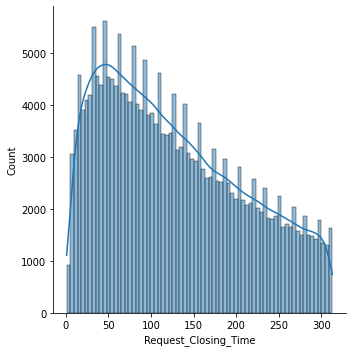

In [ ]:
sns.displot(df_requests.Request_Closing_Time, kde= True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


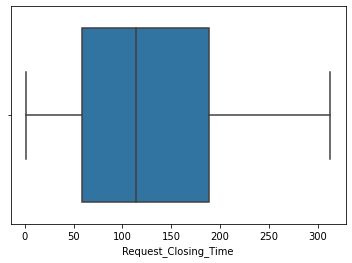

In [ ]:
sns.boxplot(df_requests.Request_Closing_Time)

In [ ]:
df1 = df_requests.groupby(by='City')
df1['Complaint_Type'].value_counts() # Number of different incedents per City with their value counts

City      Complaint_Type           
ARVERNE   Illegal Parking              53
          Animal Abuse                 37
          Blocked Driveway             33
          Noise - Street/Sidewalk      28
          Derelict Vehicle             23
                                       ..
WOODSIDE  Noise - House of Worship      2
          Bike/Roller/Skate Chronic     1
          Disorderly Youth              1
          Graffiti                      1
          Illegal Fireworks             1
Name: Complaint_Type, Length: 714, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text major ticklabel objects>)

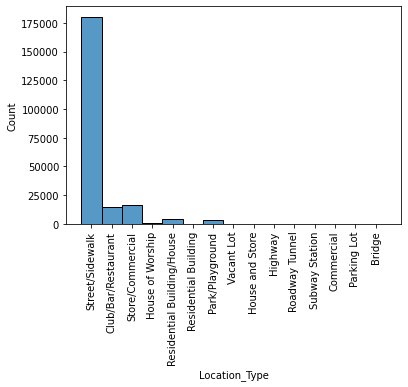

In [ ]:
sns.histplot(df_requests['Location_Type'])
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 <a list of 21 Text major ticklabel objects>)

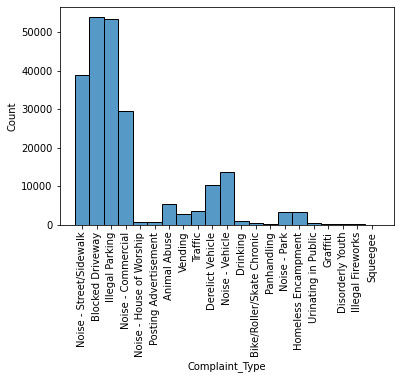

In [ ]:
sns.histplot(df_requests['Complaint_Type'])
plt.xticks(rotation=90)

In [ ]:
df_requests.groupby(['Complaint_Type']).Request_Closing_Time.mean() # Average request closing time for each complaint type

Complaint_Type
Animal Abuse                 139.403850
Bike/Roller/Skate Chronic    120.879630
Blocked Driveway             140.662357
Derelict Vehicle             134.449873
Disorderly Youth             128.096916
Drinking                     129.742714
Graffiti                     159.939394
Homeless Encampment          131.219527
Illegal Fireworks             91.435714
Illegal Parking              131.777164
Noise - Commercial           116.342427
Noise - House of Worship     109.384910
Noise - Park                 116.071562
Noise - Street/Sidewalk      117.621758
Noise - Vehicle              121.766755
Panhandling                  126.400862
Posting Advertisement         81.082051
Squeegee                      98.500000
Traffic                      108.459504
Urinating in Public          114.897826
Vending                      125.177113
Name: Request_Closing_Time, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text major ticklabel objects>)

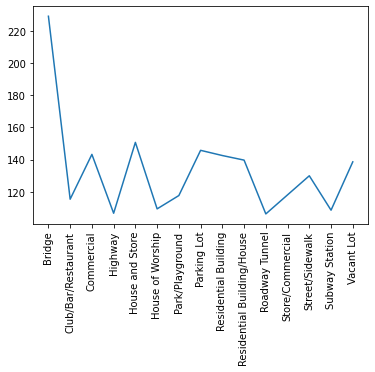

In [ ]:
loc = df_requests.groupby(by='Location_Type').Request_Closing_Time.mean() # Average request closing time based on the Location Type
plt.plot(loc.index, loc)
plt.xticks(rotation=90) 

## Number of cases according to weekdays

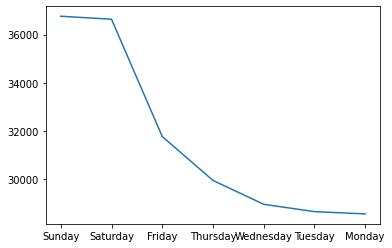

In [ ]:
df_requests['weekday'] = pd.DatetimeIndex(df_requests["Created_Date"]).day_name()
number_of_cases = df_requests['weekday'].value_counts()
plt.plot(number_of_cases.index,number_of_cases)
plt.show()

# Maximum number of open requests wrt to Complaint type

In [ ]:
df_status = df_requests.groupby(['Status', 'Complaint_Type']).size()

No handles with labels found to put in legend.


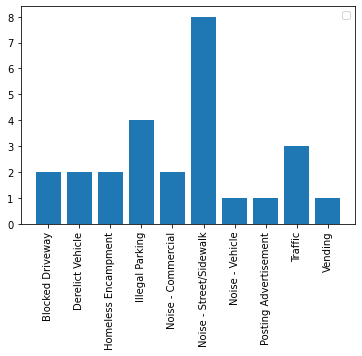

In [ ]:
plt.bar(df_status['Open'].index, df_status['Open'])
plt.xticks(rotation=90)
plt.legend()

# Complaint Types wrt Weekdays

In [ ]:
df_weekday = df_requests.groupby(['weekday','Complaint_Type']).size()
df_weekday['Tuesday'].index

Index(['Animal Abuse', 'Bike/Roller/Skate Chronic', 'Blocked Driveway',
       'Derelict Vehicle', 'Disorderly Youth', 'Drinking', 'Graffiti',
       'Homeless Encampment', 'Illegal Fireworks', 'Illegal Parking',
       'Noise - Commercial', 'Noise - House of Worship', 'Noise - Park',
       'Noise - Street/Sidewalk', 'Noise - Vehicle', 'Panhandling',
       'Posting Advertisement', 'Traffic', 'Urinating in Public', 'Vending'],
      dtype='object', name='Complaint_Type')

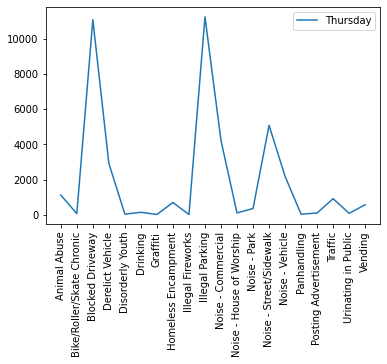

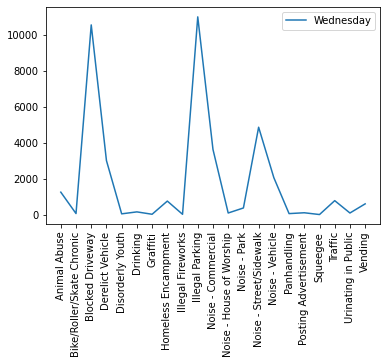

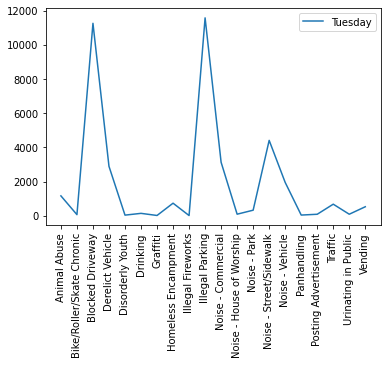

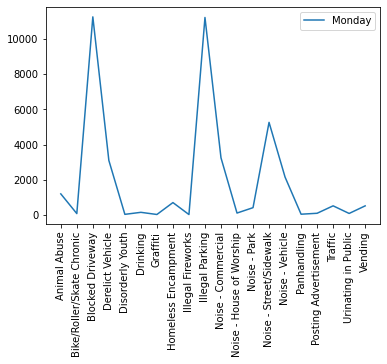

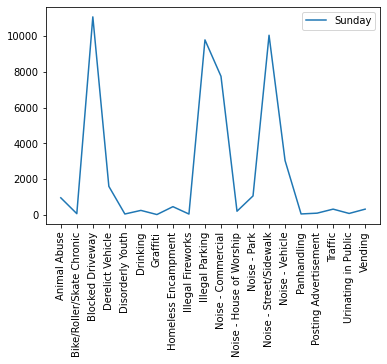

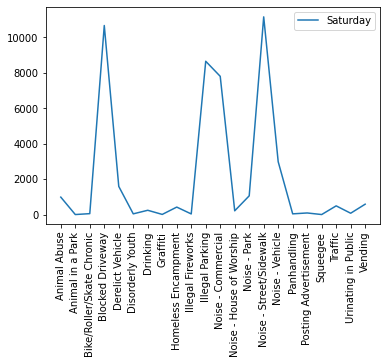

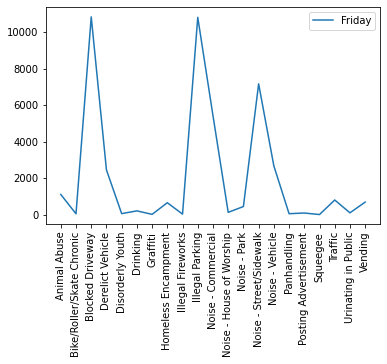

In [ ]:
for i in df_requests.weekday.unique():
  plt.plot(df_weekday[i].index, df_weekday[i] , label= i )
  plt.xticks(rotation=90)
  plt.legend()
  plt.show()

# Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

In [ ]:
Req_pivot = df_requests.pivot_table(index='City', columns='Complaint_Type', values='Request_Closing_Time', aggfunc='mean') # Method 1
Req_pivot.head()

Complaint_Type,Animal Abuse,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Fireworks,Illegal Parking,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,122.243243,NaN,134.484848,143.217391,215.5,15.000000,92.0,109.00,NaN,119.320755,...,93.636364,77.000000,112.214286,111.714286,62.0,NaN,NaN,NaN,42.000000,29.000000
ASTORIA,148.053333,85.071429,149.488926,176.822695,34.0,163.952381,212.0,177.25,37.333333,149.463734,...,109.000000,115.340000,137.706494,130.418750,69.0,NaN,NaN,166.464286,142.833333,142.933333
BAYSIDE,125.689655,NaN,125.859649,129.613924,178.0,114.000000,273.0,172.50,NaN,119.336264,...,83.000000,119.666667,91.866667,83.200000,NaN,NaN,NaN,63.125000,NaN,113.000000
BELLEROSE,135.333333,294.000000,135.386364,182.441176,111.0,235.000000,NaN,NaN,NaN,161.035714,...,132.000000,85.000000,129.500000,125.111111,NaN,135.0,NaN,152.000000,NaN,NaN
BREEZY POINT,156.500000,NaN,79.333333,289.000000,NaN,158.000000,NaN,NaN,NaN,94.777778,...,NaN,NaN,60.000000,79.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import seaborn as sns

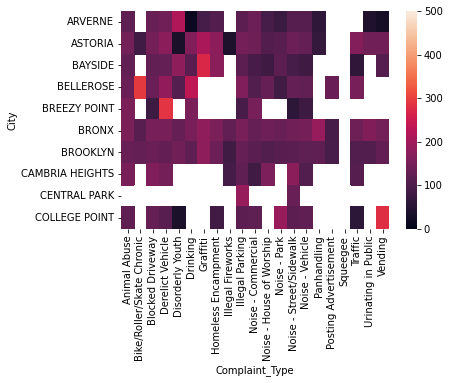

In [ ]:
sns.heatmap(Req_pivot.head(10),vmin=0, vmax=500)

In [ ]:
df_m = df_requests.groupby(['Complaint_Type','City']).Request_Closing_Time.mean()  # Method 2
df_mean = df_m.reset_index('City')

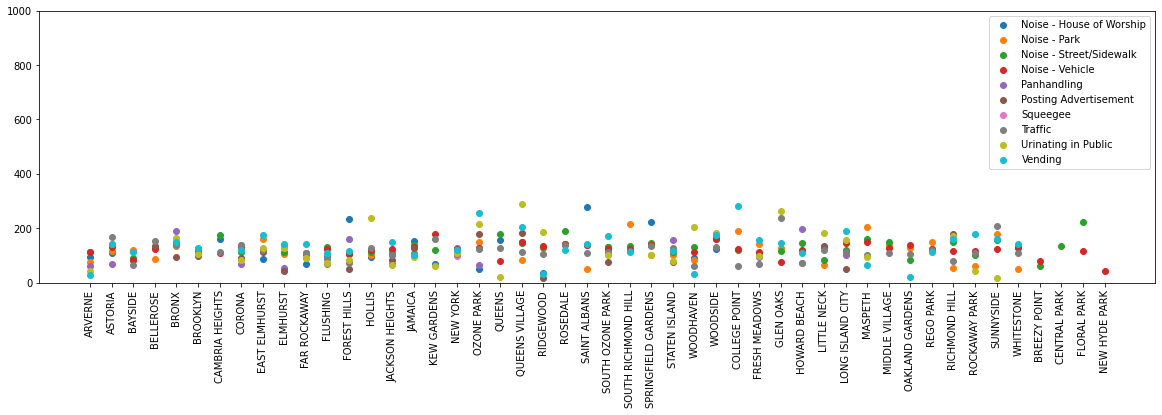

In [ ]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
for i in list(df_mean.index.unique())[11:]:
  plt.scatter(df_mean.loc[i]['City'],df_mean.loc[i]['Request_Closing_Time'], label = i)
  plt.xticks(rotation = 90)
  plt.legend(bbox_to_anchor=(1, 1))
  plt.ylim(0, 1000)

In [ ]:
from scipy import stats
from scipy.stats import chi2_contingency 
import statsmodels.api as sm
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Hypothesis Testing 
1. Whether the average response time across complaint types is similar or not (overall)

*   HO: there is no significant different in mean of Request Closing_Time for different Complaint
*   H1:there is signficant different in mban of Request_Closing Time for different


In [ ]:
anova_df= pd.DataFrame()
anova_df['Request_Closing_Time']=df_requests['Request_Closing_Time']
anova_df['Complaint_Type']=df_requests['Complaint_Type']

In [ ]:
anova_df.dropna(inplace=True)
anova_df.head()

,Request_Closing_Time,Complaint_Type
0,56.0,Noise - Street/Sidewalk
1,87.0,Blocked Driveway
2,292.0,Blocked Driveway
3,466.0,Illegal Parking
4,208.0,Illegal Parking


In [ ]:
Model = ols('Request_Closing_Time ~ Complaint_Type', data= anova_df).fit()
table=sm.stats.anova_lm(Model)
table.round()

,df,sum_sq,mean_sq,F,PR(>F)
Complaint_Type,21.0,1.449225e+09,69010697.0,539.0,0.0
Residual,298006.0,3.818813e+10,128146.0,NaN,NaN


Since p value for the Complaint is less that 0.01 thus we accept H1 i.e there is significant difference in the mean response time w.r.t different type of complaint.

Hypothesis Testing 
1. Whether the Complaint types is dependent on Location Type.
*   Ho:Complaint Type and Location Type are independent
*   H1:Complaint Type and Location Type are related **bold text**


In [ ]:
Chi_sq = pd.DataFrame()
Chi_sq['Location_Type'] = df_requests['Location_Type']
Chi_sq['Complaint_Type'] = df_requests['Complaint_Type']
Chi_sq.dropna(inplace=True)
Chi_sq.head()

,Location_Type,Complaint_Type
0,Street/Sidewalk,Noise - Street/Sidewalk
1,Street/Sidewalk,Blocked Driveway
2,Street/Sidewalk,Blocked Driveway
3,Street/Sidewalk,Illegal Parking
4,Street/Sidewalk,Illegal Parking


In [ ]:
df_Crosstab = pd.crosstab(Chi_sq['Location_Type'],Chi_sq['Complaint_Type'] )

In [ ]:
stat, p, dof, expected = chi2_contingency(df_Crosstab)

alpha=0.05
if p <= alpha:
  print('Reject Ho')
else:
  print('Reject H1')

Reject Ho


P value for the Chi swuare test is less than 0.05, hence we can reject the Null Hypothesis